In [1]:
import data
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd

import librosa
import librosa.display

from IPython.display import Audio

import os

In [2]:
path_ds = '/home/edoardobucheli/Datasets/freesound-audio-tagging-2019/'
sr = 44100

### Make Dataset

In [11]:
dataset = data.create_and_batch_dataset_freesound(path_ds, part = 'noisy')

19815


### Define Iterator

In [12]:
iterator = dataset.make_initializable_iterator()
next_step = iterator.get_next()

### Get Next Batch

In [13]:
with tf.Session() as sess:
    sess.run(iterator.initializer)
    
    this_waves,this_mX, this_pX, this_mels,this_mfccs = sess.run(next_step)

### Listen and Display

In [14]:
n = np.random.randint(0,32)
#n=7
Audio(this_waves[n].squeeze(0), rate = sr)

5


Text(0.5, 1.0, '(20, 171)')

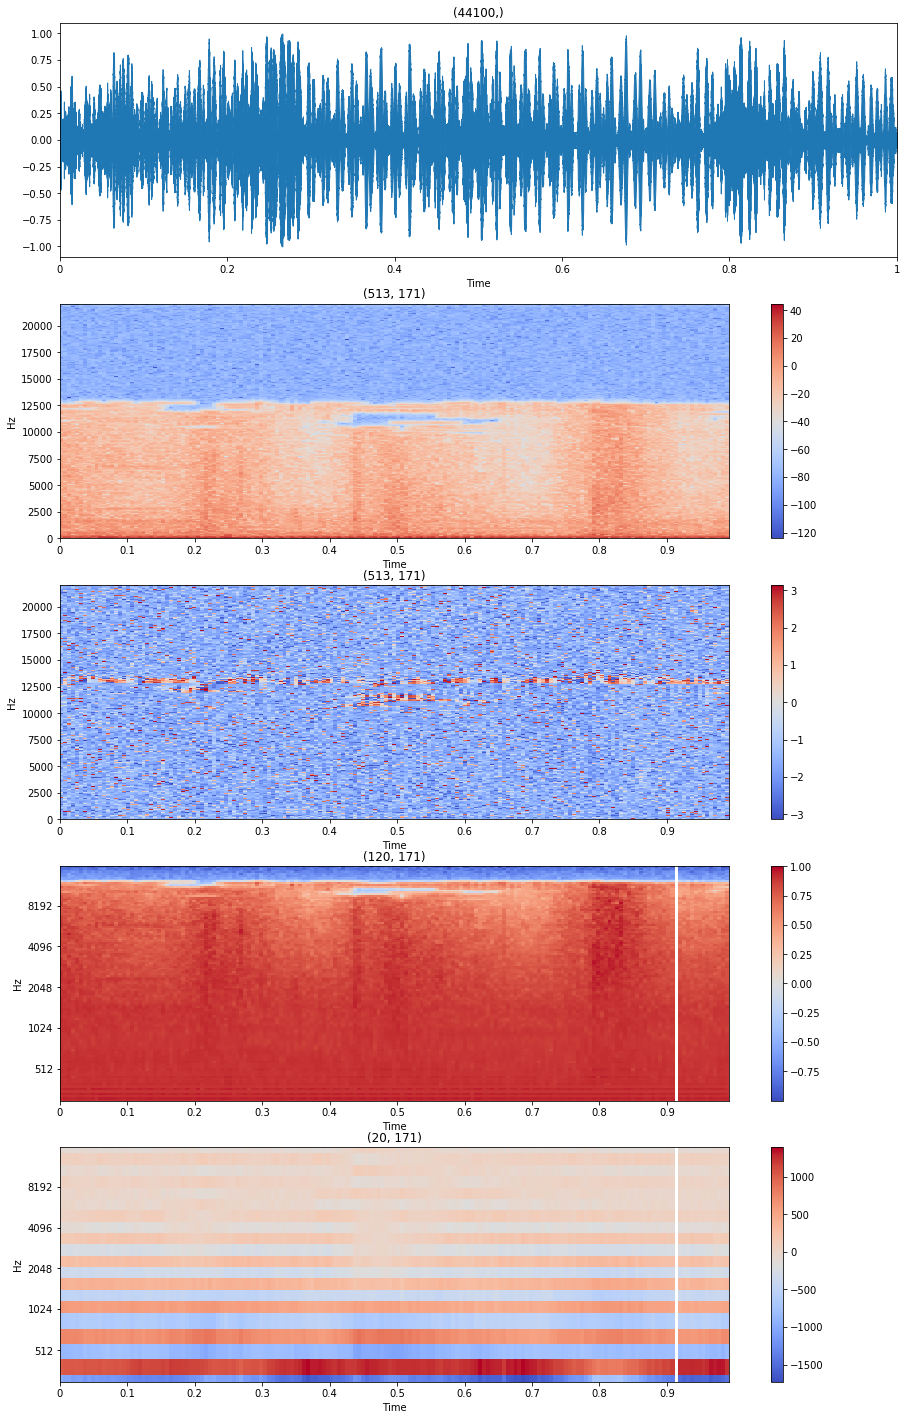

In [15]:
print(n)
plt.figure(figsize = (15,25))
plt.tight_layout()
plt.subplot(5,1,1)
librosa.display.waveplot(this_waves[n].squeeze(0),sr = sr)
plt.title(this_waves[n].squeeze(0).shape)
plt.subplot(5,1,2)
librosa.display.specshow(this_mX[n].squeeze(0).T,x_axis='time',y_axis='linear',sr=sr,hop_length=256)
plt.title(this_mX[n].squeeze(0).T.shape)
plt.colorbar()
plt.subplot(5,1,3)
librosa.display.specshow(np.diff(np.unwrap(this_pX[n].squeeze(0),axis=1),axis=1).T,x_axis='time',y_axis='linear',sr=sr,hop_length=256)
plt.colorbar()
plt.title(this_pX[n].squeeze(0).T.shape)
plt.subplot(5,1,4)
librosa.display.specshow(this_mels[n].T,sr=sr,x_axis = 'time',y_axis = 'mel',fmin=125,fmax=16000,hop_length=256)
plt.colorbar()
plt.title(this_mels[n].T.shape)
plt.subplot(5,1,5)
librosa.display.specshow(this_mfccs[n,:,:40].T,sr=sr,x_axis = 'time',y_axis = 'mel',fmin=125,fmax=16000,hop_length=256)
plt.colorbar()
plt.title(this_mfccs[n].T.shape)